# Images and Convolution

## Step 1.1

In this module, we will explore the Convolution operation. Convolution is a very popular/important operation on matrices that has applications in Natural Language Processing and Computer Vision. Therefore, in this module, we will write 2 functions that together perform basic 2D convolution operations given an image and a kernel.

The very first function we define is `convolve` that takes two 2D numpy matrices of the same size and performs the convolution operation. It takes as input two arguments, `img_subset` and `kernel`. `img_subset` is the specific region of the image that we apply the `kernel` to. Applying the `kernel` is equivalent to computing a weighted sum, `img_subset` values weighted by the corresponding `kernel` values.

In [1]:
# Import stuff

import pandas as pd
import numpy as np
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from numpy.random import randint

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Implement the convolve function. 

def convolve(mat1, mat2):
    m, n = mat1.shape
    result = 0
    for i in range(m):
        for j in range(n):
            result = result + mat1[i, j] * mat2[i, j]
            
    return result    

## Step 1.2

Now that we have the `convolve` function defined, we implement the full convolution method, i.e. a function that iteratively apply the kernel across the entire given image. This function will be called `convolveImage` and takes as input 2 arguments, `img` and `kernel`. The function takes the input image and convolves the given kernel across the entire image.

In [3]:
def convolveImage(img, kernel):
    a, b = img.shape
    c, d = kernel.shape
    result = np.zeros((a-c+1, b-d+1))
    
    for i in range(a-c+1):
        for j in range(b-d+1):
            img_subset = img[i:i+c, j:j+d]
            result[i, j] = convolve(img_subset, kernel)
    
    return result

## Step 2.1: Data visualization

We now load our dataset for this assignment which is in a numpy format. The training data is called `trainData.npy` and the corresponding label file is called `trainTruth.npy`. Similarly, for testing, we have the `testData.npy` and `testTruth.npy` datasets.

In [4]:
import numpy as np

In [5]:
# Load the datasets into trainx, trainy, testx, testy

trainx = np.load('trainData.npy')
trainy = np.load('trainTruth.npy')
testx = np.load('testData.npy')
testy = np.load('testTruth.npy')

The data files contain 3-D matrices with each sample/instance represented by a 2-D matrix. In these matrices, the first index represents the sample number while the last 2 index represent the size of each instance. Therefore, if the shape of trainx is (a,b,c), then we have `a` number of samples in the data with each sample being a 2-D matrix of size `(b,c)`.  

Let's visualize the data to see what exactly it is that we are working with. Using numpy indexing, we take out the 6th sample in the training data to have a look.

In [6]:
# Select the 6th sample from the training dataset (trainx) 
# and set it to the variable 'img1'
img1 = trainx[5, 0:, 0:]

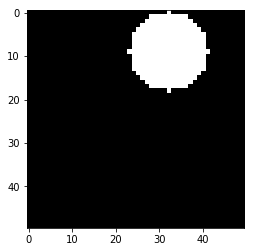

In [7]:
# View the plot
plt.imshow(img1, cmap = 'gray');

Now plot the 12th element in the training dataset.

In [8]:
# Select the 12th sample from the training dataset(trainx) and set it to the variable 'img2'
img2 = trainx[11, 0:, 0:]

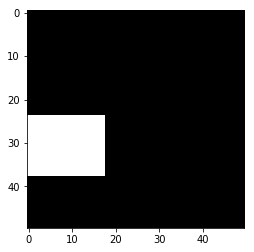

In [9]:
# View the plot
plt.imshow(img2, cmap = 'gray')

Now we will check for the corresponding values of the 5th and 11th element in `trainy`. Assuming 1 means true and 0 means false, we can see the truth value for a rectangle is 1.

In [10]:
trainy[5], trainy[11]

(0, 1)

In [11]:
circleTruthValue = 0

## Deriving Convolution features

In this module, we derive features for each of the instances in our training data (as well as testing) by applying the convolution operator over each of the instances. These features will then be used to create a Machine Learning model that predicts whether the image contains a rectangle or a circle.

### Step 3.1

The first step in this process is to load the kernels into a variable called `kernels`.

In [12]:
# Load the kernels.py file and name the variable 'kernels'
kernels = np.load('kernels.npy')

### Step 3.2 Visualizing Kernels

Similar to step 2.1, visualizing the kernels can help understand what exactly the kernels look like. We will plot the 5th kernel from the `kernels` variable in the following cell.

In [13]:
# Set the 5th kernel to the 'img3' variable
img3 = kernels[4, 0:, 0:]

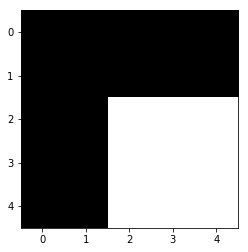

In [14]:
# View the plot
plt.imshow(img3, cmap = 'gray')

### Visualizing the Effect of Convolution with kernels
Now to visualize the effect of convolving an image with a kernel, we can run the next cell to see the input image, the kernel, and the output of the convolution of the kernel on the given image.

In [15]:
# Set 'kernel' to be the 4th element in the kernels variable and 'img4' as the 116th element from trainx

kernel = kernels[3, 0:, 0:]
img4 = trainx[115, 0:, 0:]

In [16]:
output = convolveImage(img4, kernel)

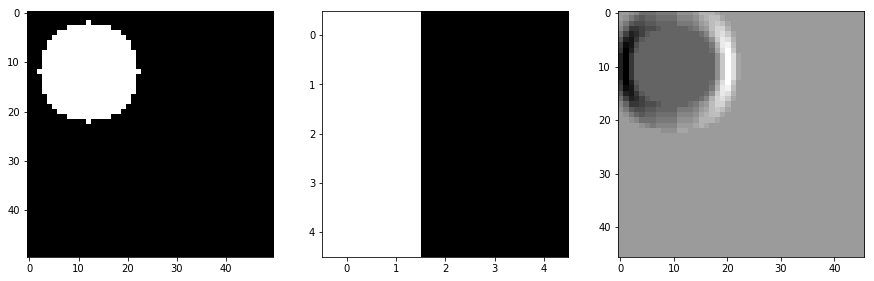

In [17]:
# We should be able to see three plots here

plt.figure(figsize = (15,10))
plt.subplot(131)
plt.imshow(img4, cmap = 'gray')

plt.subplot(132)
plt.imshow(kernel, cmap = 'gray')

plt.subplot(133)
plt.imshow(output, cmap = 'gray')

### Step 3.3: createFeatureVector

In this module, we implement a function called createFeatureVector that takes as input a single image and a set of kernels. 

Its task can be summarized as :
 * Initialize a empty list to store all features for the image
 * For every kernel:
      - apply the `convolveImage` function over the image
      - compute the sum over the output matrix 
      - add the computed sum to the feature list
 * return the list as a numpy array

In [18]:
def createFeatureVector(img, kernels):
    result = []
    for i in range(kernels.shape[0]):
        kernel = kernels[i, 0:, 0:]
        matrix = convolveImage(img, kernel)
        result.append(np.sum(matrix))
        
    return np.array(result)

### Step 3.4 featurizeData

The next function, `featurizeData` takes as input the dataset and computes the output of `createFeatureVector` on each of the instances in the dataset. Takes 2 inputs : `dataset` and `kernels`

The output will be a 2-D matrix with each row representing the feature vectors computed for each of the instances in the given dataset.

In [19]:
def featurizeData(dataset, kernels):
    array = np.array([])
    for i in range(dataset.shape[0]):
        this_array = createFeatureVector(dataset[i, 0:], kernels)
        if array.size:
            array = np.vstack([array, this_array])
        else:
            array = this_array
        
        
    return array

Now using the featurizeData function defined above, we will compute the featurized versions of the training and testing data and name them `trainx_feat` and `testx_feat`.

In [20]:
trainx_feat = featurizeData(trainx, kernels)
testx_feat = featurizeData(testx, kernels)

## Modeling

In this section, we will use the features that we have created and build a Classification model. In particular, we will be using the Random Forest model, which is one of better performing ML models. 

### Step 4.1 Using Raw Features 

We first train a model using the raw values of the images itself.

In [21]:
i, j, k = trainx.shape
x, y, z = testx.shape

trainx_raw = trainx.reshape(i, j*k)
testx_raw = testx.reshape(x, y*z)

Now we fit a random forest model to `trainx_raw`.

In [22]:
# Define and train rfModel_raw

rfModel_raw = RandomForestClassifier(n_estimators=100, random_state=0)
rfModel_raw.fit(trainx_raw, trainy)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Now we predict for the test dataset `testx_raw` and calculate the accuracy for the prediction. We will also store the calculated accuracy in `accuracy_raw`.

In [23]:
raw_pred = rfModel_raw.predict(testx_raw)
accuracy_raw = accuracy_score(testy, raw_pred)

In [24]:
# View accuracy_raw 
accuracy_raw

0.84

### 4.2 Using Convolution features

Now instead of using the raw pixel values, we use the convolution features.

In [25]:
rfModel_conv = RandomForestClassifier(n_estimators=100, random_state=0)
rfModel_conv.fit(trainx_feat, trainy)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Predict for the `testx` dataset and store the accuracy value in `accuracy_conv`

In [26]:
conv_pred = rfModel_conv.predict(testx_feat)
accuracy_conv = accuracy_score(testy, conv_pred)

In [27]:
# View accuracy_conv
accuracy_conv

0.96

## Variations

We now explore some variations to the data creation process and observe how it affects the model performance.


### Step 5.1 Thresholding

The Visualization in Step 3.2 gives us a good idea about the effect of convolving kernels on images. However, there are ways we can make these effects more stronger.

We will write a function called `thresholdImg` that takes as input an image and does the following :
 * All values less than 0 are set to -1
 * All values greater than 0 are set to +1
 * All values equal to 0 are not changed

In [28]:
def thresholdImg(img):
    img[img<0] = -1
    img[img>0] = 1
    
    return img

Take the 5th image in `trainx`, convolve it with the 4th element in `kernels`, threshold the output of the convolution using ` thresholdImg` and store the output in `threshOutput`. Also plot `threshOutput`

In [29]:
# Create threshOutput from the various image operations
threshOutput = thresholdImg(convolveImage(trainx[4, 0:, 0:], kernels[3, 0:, 0:]))

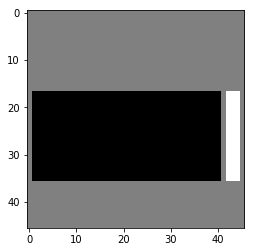

In [30]:
# View the plot
plt.imshow(threshOutput, cmap = 'gray')

Now that we have seen the effect of thresholding the output of the convolutions, we apply this to all the images in the trainx and testx arrays while we create the featureVectors. In the next cells we will define the functions `createFeatureVec_thresh` and `featurizeData_thresh`.

In [31]:
def createFeatureVector_thresh(img, kernels):
    result = []
    for i in range(kernels.shape[0]):
        kernel = kernels[i, 0:, 0:]
        matrix = thresholdImg(convolveImage(img, kernel))
        result.append(np.sum(matrix))
        
    return np.array(result)

In [32]:
def featurizeData_thresh(dataset, kernels):
    array = np.array([])
    for i in range(dataset.shape[0]):
        this_array = createFeatureVector_thresh(dataset[i, 0:], kernels)
        if array.size:
            array = np.vstack([array, this_array])
        else:
            array = this_array
        
        
    return array

Using these functions, we create `trainx_feat_thresh` and `testx_feat_thresh` from the trainx and testx datasets.

In [33]:
trainx_feat_thresh = featurizeData_thresh(trainx, kernels)
testx_feat_thresh = featurizeData_thresh(testx, kernels)

Now using the above features, we train a new Random Forest model called `rfModel_thresh` that takes as input `trainx_feat_thresh`. We will predict on the test dataset and store the accuracy value in `accuracy_thresh` as well.

In [34]:
# Define rfModel_thresh 
# Train the model, predict on testx_feat_thresh and 
# store the accuracy in accuracy_thresh

rfModel_thresh = RandomForestClassifier(n_estimators=100, random_state=0)
rfModel_thresh.fit(trainx_feat_thresh, trainy)

thresh_pred = rfModel_thresh.predict(testx_feat_thresh)
accuracy_thresh = accuracy_score(testy, thresh_pred)

In [35]:
# View accuracy_thresh here
accuracy_thresh

1.0

### Step 5.2 Additional Summarization

In createFeatureVector, after applying the convolution, we simply summarize the output by taking the sum of the output.

The sum alone may not be a very good summarization. Therefore in addition to the sum, we add 3 more summarization values : min, max and standard deviation. 

In [36]:
def createFeatureVector_new(img, kernels):
    result = []
    for i in range(kernels.shape[0]):
        kernel = kernels[i, 0:, 0:]
        matrix = convolveImage(img, kernel)
        result.append(np.sum(matrix))
        result.append(np.min(matrix))
        result.append(np.max(matrix))
        result.append(np.std(matrix))
        
    return np.array(result)


def featurizeData_new(dataset, kernels):
    array = np.array([])
    for i in range(dataset.shape[0]):
        this_array = createFeatureVector_new(dataset[i, 0:], kernels)
        if array.size:
            array = np.vstack([array, this_array])
        else:
            array = this_array
        
    return array

In [37]:
trainx_feat_new = featurizeData_new(trainx, kernels)
testx_feat_new = featurizeData_new(testx, kernels)

In [38]:
rfModel2 = RandomForestClassifier(n_estimators=100, random_state=0)
rfModel2.fit(trainx_feat_new, trainy)

new_pred = rfModel2.predict(testx_feat_new)
accuracy_2 = accuracy_score(testy, new_pred)

In [39]:
# View accuracy_2
accuracy_2

1.0

What we have essentially observed (and partially implemented) is how a Convolutional Neural Network works. CNNs are one of the most popular and best performing models out there, especially for Computer Vision tasks. The different modules in this notebook should give us a good intuition as to what a CNN tries to achieve and why it tends to perform better than vanilla Machine Learning models. 

The advantage of CNNs is its ability to learn meaningful features (`kernels`) that helps it recognize the differences between shapes/objects etc. That's why just 8 kernels were able to give much better performance than 2,500 raw pixel value features.

---

Note: This is one of the assignments of CIS 545 Big Data Analytics at University of Pennsylvania during Spring 2019.